<a href="https://colab.research.google.com/github/kurokawa5/ML4DS/blob/main/02_linear_regression/02_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
%matplotlib inline
import pylab as plt

data = np.loadtxt('/content/drive/MyDrive/05_workspace/09_ml4ds/02_linear_regression/olympic100m.txt', delimiter=',') # make sure olympic100m.txt is in the right folder
x = data[:,0][:,None] # make x a matrix
t = data[:,1][:,None] # make t a column vector 

In [3]:
#x.shape
# -> (27, 1)
#t.shape
# -> (27, 1)

#### Task 2: Perform Polynomial Regression on the Olympic data

#### Task 2.1 Rescale $x$ 
We rescale  𝑥  to make it small. Doing so will stablise the computatoin, otherwise it quickly becomes unfeasible to fit polynomials over ~ 2000 . 

In [4]:
def transform(x):
    return (x-np.mean(x))/np.std(x) 

Text(0, 0.5, 'Time (seconds)')

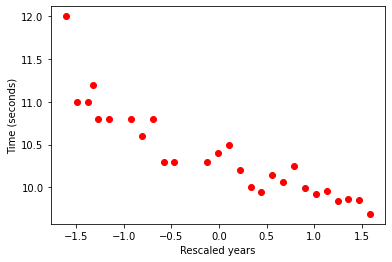

In [5]:
x = transform(x) # rescale x here
plt.plot(x, t, 'ro')
plt.xlabel('Rescaled years')
plt.ylabel('Time (seconds)')

#### Task 2.2 Write you own function to construct the design matrix with polynomials

$$\mathbf{X} = \begin{bmatrix}
    1       & x_{1} & x_{1}^2 & \dots & x_{1}^K \\
    1       & x_{2} & x_{2} & \dots & x_{2}^K \\
    \vdots & \vdots &\vdots &\ddots &\vdots\\
    1       & x_{N} & x_{N}^2 & \dots & x_{N}^K
\end{bmatrix} $$

In [6]:
def make_polynomial(x, maxorder): # The np.hstack function can be very helpful
    X = np.ones_like(x) 
    for i in range(1,maxorder+1):
        X = np.hstack((X,x**i))
        #print(X)
    return(X) 

#### Task 2.3 Construct the design matrix with a predefined maximum polynomial order 


In [7]:
poly_order = 9 #K=9
X_train = make_polynomial(x, poly_order) 

In [8]:
#X_train.shape
# -> (27, 10)

#### Task 2.4 Fit a linear regression model with polynomial matrix and print out the training loss

In [9]:
from sklearn.linear_model import LinearRegression

poly_reg = LinearRegression().fit(X_train, t) # Fit a linear model
print('loss at order ', poly_order, ' :', np.mean((t-poly_reg.predict(X_train))**2 ) )

loss at order  9  : 0.015317351464103028


#### Task 2.5 Plot the fitted model and data

(100, 10) (100, 1)


Text(0, 0.5, 'Time (seconds)')

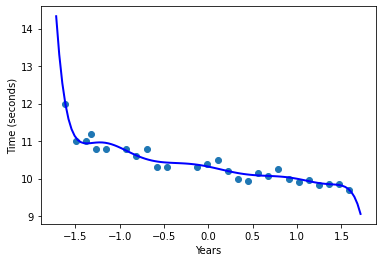

In [10]:
#temp = []
x_test = np.linspace(1880,2020, 100)[:,None] # test data
x_test = transform(x_test) # do the same rescaling to the test data 
X_test = make_polynomial(x_test, poly_order) # construct the polynomial matrix for test data
f_test = poly_reg.predict(X_test)

print(np.shape(X_test), np.shape(f_test))
plt.plot(x_test,f_test,'b-',linewidth=2) # plot the fitted data
plt.scatter(x,t) # draw a scatter plot
plt.xlabel('Years') # always label x&y-axis
plt.ylabel('Time (seconds)') # always label x&y-axis

(100, 1) [[-1.71481604]
 [-1.68017329]
 [-1.64553055]
 [-1.6108878 ]
 [-1.57624505]
 [-1.5416023 ]
 [-1.50695955]
 [-1.4723168 ]
 [-1.43767406]
 [-1.40303131]
 [-1.36838856]
 [-1.33374581]
 [-1.29910306]
 [-1.26446031]
 [-1.22981757]
 [-1.19517482]
 [-1.16053207]
 [-1.12588932]
 [-1.09124657]
 [-1.05660382]
 [-1.02196108]
 [-0.98731833]
 [-0.95267558]
 [-0.91803283]
 [-0.88339008]
 [-0.84874733]
 [-0.81410459]
 [-0.77946184]
 [-0.74481909]
 [-0.71017634]
 [-0.67553359]
 [-0.64089084]
 [-0.6062481 ]
 [-0.57160535]
 [-0.5369626 ]
 [-0.50231985]
 [-0.4676771 ]
 [-0.43303435]
 [-0.39839161]
 [-0.36374886]
 [-0.32910611]
 [-0.29446336]
 [-0.25982061]
 [-0.22517786]
 [-0.19053512]
 [-0.15589237]
 [-0.12124962]
 [-0.08660687]
 [-0.05196412]
 [-0.01732137]
 [ 0.01732137]
 [ 0.05196412]
 [ 0.08660687]
 [ 0.12124962]
 [ 0.15589237]
 [ 0.19053512]
 [ 0.22517786]
 [ 0.25982061]
 [ 0.29446336]
 [ 0.32910611]
 [ 0.36374886]
 [ 0.39839161]
 [ 0.43303435]
 [ 0.4676771 ]
 [ 0.50231985]
 [ 0.5369626 ]
 

Text(0, 0.5, 'Time (seconds)')

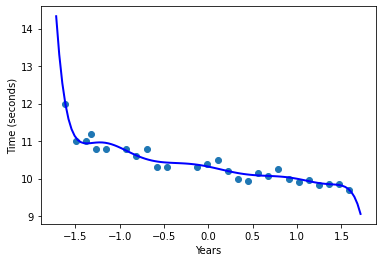

In [11]:
x_test = np.linspace(1880,2020, 100)[:,None] # test data
x_test = transform(x_test) # do the same rescaling to the test data 
X_test = make_polynomial(x_test, poly_order) # construct the polynomial matrix for test data
f_test = poly_reg.predict(X_test)

plt.plot(x_test,f_test,'b-',linewidth=2) # plot the fitted data
print(np.shape(x_test),x_test)
print(np.shape(f_test),f_test)

plt.scatter(x,t) # draw a scatter plot
plt.xlabel('Years') # always label x&y-axis
plt.ylabel('Time (seconds)') # always label x&y-axis

### Task 3: Choosing Polynomial order with Cross-Validation

#### Task 3.1: Cross-Validation with a given Polynomial order.
Reference for `KFold`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [12]:
from sklearn.model_selection import KFold 
cv = KFold(n_splits = 5) # 
loss = []
reg = LinearRegression()

poly_order = 9
X_train = make_polynomial(x, poly_order)

for train_index, test_index in cv.split(X_train): 
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train_cv, X_test_cv = X_train[train_index], X_train[test_index] # select X for training and testing
    t_train_cv, t_test_cv = t[train_index], t[test_index] # select t for training and testing
    reg.fit(X_train_cv, t_train_cv) # fit a model on the training data 
    loss.append( np.mean(( t_test_cv - reg.predict(X_test_cv) )**2  ) ) # compute loss on test data
print(loss) # print loss across fold
print(np.mean(loss)) # print average loss at this polynomial order

TRAIN: [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26] TEST: [0 1 2 3 4 5]
TRAIN: [ 0  1  2  3  4  5 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26] TEST: [ 6  7  8  9 10 11]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 17 18 19 20 21 22 23 24 25 26] TEST: [12 13 14 15 16]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 22 23 24 25 26] TEST: [17 18 19 20 21]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] TEST: [22 23 24 25 26]
[2331.177225267947, 0.4133916880375341, 0.03962632115541277, 0.1314825502663531, 107.12933254071254]
487.7782116736238


#### Task 3.2: Cross-Validation for a range of Polynomial orders.

Text(0, 0.5, 'Log Loss')

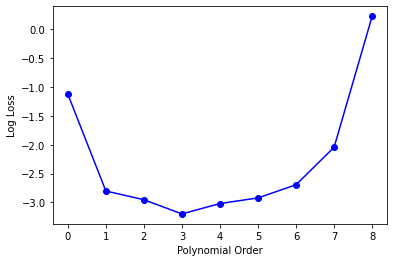

In [13]:
cv = KFold(n_splits = 10)
reg = LinearRegression()
all_loss = []
for i in range(9):  # 1st for loop over polynomial orders 
    poly_order = i
    X_train = make_polynomial(x, poly_order)
    loss_at_order = []
    for train_index, test_index in cv.split(X_train): # 2nd for loop for cross-validation
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        t_train_cv, t_test_cv = t[train_index], t[test_index]
        reg.fit(X_train_cv, t_train_cv)
        loss_at_order.append( np.mean(( t_test_cv - reg.predict(X_test_cv) )**2  ) ) # collect loss at fold
    all_loss.append(np.mean(loss_at_order)) # collect loss at order
plt.plot(np.log(all_loss), 'bo-') # plot log(loss) at order
plt.xlabel('Polynomial Order') # always label x&y-axis
plt.ylabel('Log Loss') # always label x&y-axis

Text(0, 0.5, 'Loss')

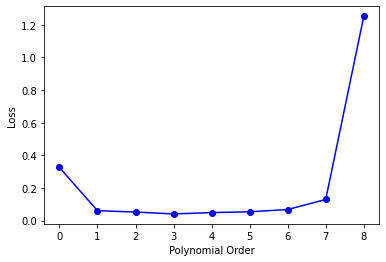

In [14]:
plt.plot(all_loss, 'bo-') # plot log(loss) at order
plt.xlabel('Polynomial Order') # always label x&y-axis
plt.ylabel('Loss') # always label x&y-axis

[Why not Mean Squared Error(MSE) as a loss function for Logistic Regression? 🤔](https://towardsdatascience.com/why-not-mse-as-a-loss-function-for-logistic-regression-589816b5e03c)

### Task 4: Cross-Validation for Polynomial order on new data

In [15]:
np.random.seed(1) # fix random seed such that every time we get the same random numbers

N = 100 # total number of data points 
x = 10*np.random.rand(N,1) - 5 # generate random x
t = 5*x**3 - x**2 + x + 200*np.random.randn(N,1) # generate t according to the true model with additive noise

N_independent_test = 50 # total number of independent testing data points 
x_independent_test = 10*np.random.rand(N_independent_test,1) - 5 # generate independent testing x
t_independent_test = 5*x_independent_test**3 - x_independent_test**2 + x_independent_test + 200*np.random.randn(N_independent_test,1) # generate independent testing t with noise

### Plot new data.

Text(0, 0.5, 't')

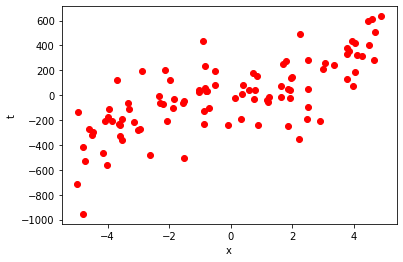

In [16]:
plt.plot(x, t, 'ro')
plt.xlabel('x')
plt.ylabel('t')

#### Task 4.1: Redo Cross-Validation for Polynomial order on new data. Plot CV loss, training loss, and loss on the independent test set

Text(0, 0.5, 'Log Loss')

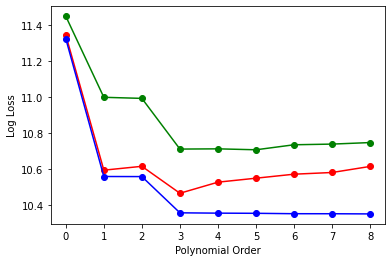

In [17]:
cv = KFold(n_splits = 10)
reg = LinearRegression() # model for CV
reg_train = LinearRegression() # model for loss on training and independent test 

all_loss = []
all_loss_trian = []
all_loss_independent_test = []

for i in range(9):  # 1st for loop over polynomial order
    
    poly_order = i 
    
   
    X_train = make_polynomial(x, poly_order) # construct polynomial matrix for all training data
    reg_train.fit(X_train, t) # fit model on all training data
    all_loss_trian.append(  np.mean(( t - reg_train.predict(X_train))**2)) # collect training loss
    
    X_independent_test = make_polynomial(x_independent_test, poly_order) #construct polynomial matrix for the independent test data
    all_loss_independent_test.append(
        np.mean(( t_independent_test - 
                 reg_train.predict(X_independent_test))**2)) # collect loss on independent test data
    
    loss_at_order = [] 
    for train_index, test_index in cv.split(X_train): # 2nd for loop over folds
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        t_train_cv, t_test_cv = t[train_index], t[test_index]
        reg.fit(X_train_cv, t_train_cv)
        loss_at_order.append( np.mean(( t_test_cv - reg.predict(X_test_cv) )**2  ) )
    all_loss.append(np.mean(loss_at_order)) 

plt.plot(np.log(all_loss), 'ro-')
plt.plot(np.log(all_loss_trian), 'bo-')
plt.plot(np.log(all_loss_independent_test), 'go-')
plt.xlabel('Polynomial Order') # always label x&y-axis
plt.ylabel('Log Loss') # always label x&y-axis

### Task 5: Polynomial Linear Regression with L2 regression.

$$ \hat{\mathbf{w}}_{ridge} = \underset{\mathbf{w} }{\mathrm{argmin}}
 \frac{1}{N} (\mathbf{t} - \mathbf{X}\mathbf{w} )^{T} (\mathbf{t} - \mathbf{X}\mathbf{w} ) + \alpha \mathbf{w}^T \mathbf{w}$$
check out https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html for `Ridge`
check out https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html for `GridSearchCV`

Text(0, 0.5, 'Time (seconds)')

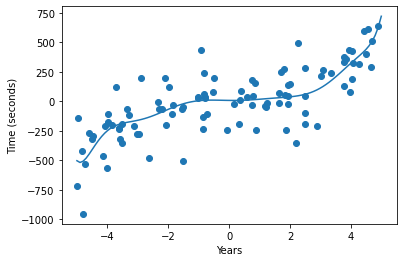

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

poly_order = 10 
X_train = make_polynomial(x, poly_order) # construct polynomial matrix on training data

x_test = np.linspace(-5,5,100)[:,None] # generate x_test for plotting
X_test = make_polynomial(x_test, poly_order) # construct polynomial matrix on x_test

ridge = Ridge() # call ridge model
parameters = {'alpha': np.linspace(1, 10, 20)} # set out search grid for alpha
ridge_model = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=5) # Define CV on the search grid to define alpha
ridge_model.fit(X_train, t) # Fit training data

plt.plot(x_test, ridge_model.predict(X_test)) # plot the model
plt.scatter(x,t) # draw a scatter plot
plt.xlabel('Years') # always label x&y-axis
plt.ylabel('Time (seconds)') # always label x&y-axis